In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import plotly 
from plotly import tools
import plotly.offline as py
from plotly import subplots
import plotly.graph_objs as go
from wordcloud import WordCloud,STOPWORDS

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
pd.set_option('display.max_colwidth',1)
data.head()

qid  \
0  00002165364db923c7e6   
1  000032939017120e6e44   
2  0000412ca6e4628ce2cf   
3  000042bf85aa498cd78e   
4  0000455dfa3e01eae3af   

                                                                       question_text  \
0  How did Quebec nationalists see their province as a nation in the 1960s?            
1  Do you have an adopted dog, how would you encourage people to adopt and not shop?   
2  Why does velocity affect time? Does velocity affect space geometry?                 
3  How did Otto von Guericke used the Magdeburg hemispheres?                           
4  Can I convert montra helicon D to a mountain bike by just changing the tyres?       

   target  
0  0       
1  0       
2  0       
3  0       
4  0

In [5]:
print(f"The training data has {data.shape[0]} instances and {data.shape[1]} rows")

The training data has 1306122 instances and 3 rows


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


#### A look at Insincere questions

In [7]:
data_insincere = data[data['target'] == 1]
data_insincere

qid  \
22       0000e91571b60c2fb487   
30       00013ceca3f624b09f42   
110      0004a7fcb2bf73076489   
114      00052793eaa287aff1e1   
115      000537213b01fd77b58a   
...                       ...   
1306093  fffeba722d9b371bd1b9   
1306094  fffee269360dd0d3947a   
1306099  ffff0e4ea1bb6e16feec   
1306103  ffff3f0a2449ffe4b9ff   
1306112  ffffa5b0fa76431c063f   

                                                                                                                                                                                                                 question_text  \
22       Has the United States become the largest dictatorship in the world?                                                                                                                                                     
30       Which babies are more sweeter to their parents? Dark skin babies or light skin babies?                                                                                                                                  
110      If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?                                                                                                                  
114      I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?                                                                               
115      Which races have the smallest penis?                                                                                                                                                                                    
...                                       ...                                                                                                                                                                                    
1306093  How is it to have intimate relation with your cousin?                                                                                                                                                                   
1306094  Why is it when singers have lyrics about voices in their head, religious people say they hear god and anyone stating they are being targeted by voice to brain technology? Are they called delusional schizo?           
1306099  Do pakis smell of curry and shit?                                                                                                                                                                                       
1306103  Isn't Trump right after all? Why should the USA be benevolent towards it's neighbor Mexico, and not put America first, when Russia is invading Ukraine? Even India imposed a blockade over Nepal after an earthquake?   
1306112  Are you ashamed of being an Indian?                                                                                                                                                                                     

         target  
22       1       
30       1       
110      1       
114      1       
115      1       
...     ..       
1306093  1       
1306094  1       
1306099  1       
1306103  1       
1306112  1       

[80810 rows x 3 columns]

#### A look at sincere questions

In [8]:
data_sincere = data[data['target'] == 0]
data_sincere

qid  \
0        00002165364db923c7e6   
1        000032939017120e6e44   
2        0000412ca6e4628ce2cf   
3        000042bf85aa498cd78e   
4        0000455dfa3e01eae3af   
...                       ...   
1306117  ffffcc4e2331aaf1e41e   
1306118  ffffd431801e5a2f4861   
1306119  ffffd48fb36b63db010c   
1306120  ffffec519fa37cf60c78   
1306121  ffffed09fedb5088744a   

                                                                                         question_text  \
0        How did Quebec nationalists see their province as a nation in the 1960s?                        
1        Do you have an adopted dog, how would you encourage people to adopt and not shop?               
2        Why does velocity affect time? Does velocity affect space geometry?                             
3        How did Otto von Guericke used the Magdeburg hemispheres?                                       
4        Can I convert montra helicon D to a mountain bike by just changing the tyres?                   
...                                                                                ...                   
1306117  What other technical skills do you need as a computer science undergrad other than c and c++?   
1306118  Does MS in ECE have good job prospects in USA or like India there are more IT jobs present?     
1306119  Is foam insulation toxic?                                                                       
1306120  How can one start a research project based on biochemistry at UG level?                         
1306121  Who wins in a battle between a Wolverine and a Puma?                                            

         target  
0        0       
1        0       
2        0       
3        0       
4        0       
...     ..       
1306117  0       
1306118  0       
1306119  0       
1306120  0       
1306121  0       

[1225312 rows x 3 columns]

In [9]:
print(f"Percentage of training instances that are classified as sincere questions:{sum(data.target == 0)/len(data)}")

Percentage of training instances that are classified as sincere questions:0.9381298224821265


In [10]:
print(f"Percentage of training instances that are classified as insincere questions:{sum(data.target == 1)/len(data)}")

Percentage of training instances that are classified as insincere questions:0.06187017751787352


In [11]:
data['target'].value_counts()

0    1225312
1    80810  
Name: target, dtype: int64

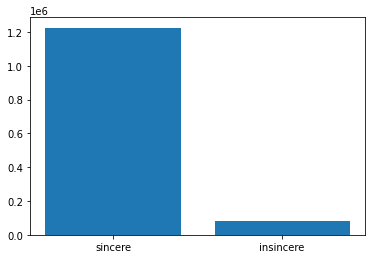

In [12]:
import matplotlib.pyplot as plt

plt.bar(["sincere","insincere"],[sum(data.target == 0), sum(data.target == 1)])
plt.show()

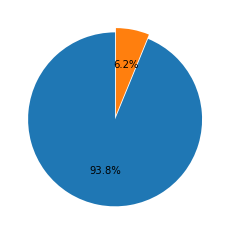

In [13]:
plt.pie([sum(data.target == 0)/len(data), sum(data.target == 1)/len(data)],autopct='%1.1f%%',startangle=90,explode=[0.05,0])
plt.show()

### The training data is highly imbalanced meaning even if we classify all the points as sincere we end up with an accuracy of ~94%. Accuracy is probably not a good indicator so let's use F1-measure to evaluate our model.

In [14]:
#Example questions that are classified as Insincere.
data[data.target==1].question_text[127]

'How do I marry an American woman for a Green Card? How much do they charge?'

In [15]:
#Example questions that are classified as sincere.
data[data.target==0].question_text[1000]

'What is that one life changing novel that you would recommend to everyone?'

In [16]:
#Average word length for all, sincere and Insincere questions
print('Average word length of all questions: {}'.format(int(np.mean(data['question_text'].apply(lambda x: len(x.split()))))))
print('Average word length of sincere questions: {}'.format(int(np.mean(data_sincere['question_text'].apply(lambda x: len(x.split()))))))
print('Average word length of Insincere questions: {}'.format(int(np.mean(data_insincere['question_text'].apply(lambda x: len(x.split()))))))

Average word length of all questions: 12
Average word length of sincere questions: 12
Average word length of Insincere questions: 17


In [17]:
#Average word length for all, sincere and Insincere questions
print('Maximum word length of all questions: {}'.format(int(np.max(data['question_text'].apply(lambda x: len(x.split()))))))
print('Maximum word length of sincere questions: {}'.format(int(np.max(data_sincere['question_text'].apply(lambda x: len(x.split()))))))
print('Maximum word length of Insincere questions: {}'.format(int(np.max(data_insincere['question_text'].apply(lambda x: len(x.split()))))))

Maximum word length of all questions: 134
Maximum word length of sincere questions: 134
Maximum word length of Insincere questions: 64


In [18]:
#Average character length for all, sincere and Insincere questions
print('Average character length of all questions: {}'.format(int(np.mean(data['question_text'].apply(lambda x: len(x))))))
print('Average character length of Sincere questions: {}'.format(int(np.mean(data_sincere['question_text'].apply(lambda x: len(x))))))
print('Average character length of Insincere questions: {}'.format(int(np.mean(data_insincere['question_text'].apply(lambda x: len(x))))))


Average character length of all questions: 70
Average character length of Sincere questions: 68
Average character length of Insincere questions: 98


In [19]:
print('Maximum word length of sincere questions: {}'.format(int(np.min(data_sincere['question_text'].apply(lambda x: len(x.split()))))))
print('Maximum word length of Insincere questions: {}'.format(int(np.min(data_insincere['question_text'].apply(lambda x: len(x.split()))))))

Maximum word length of sincere questions: 2
Maximum word length of Insincere questions: 1


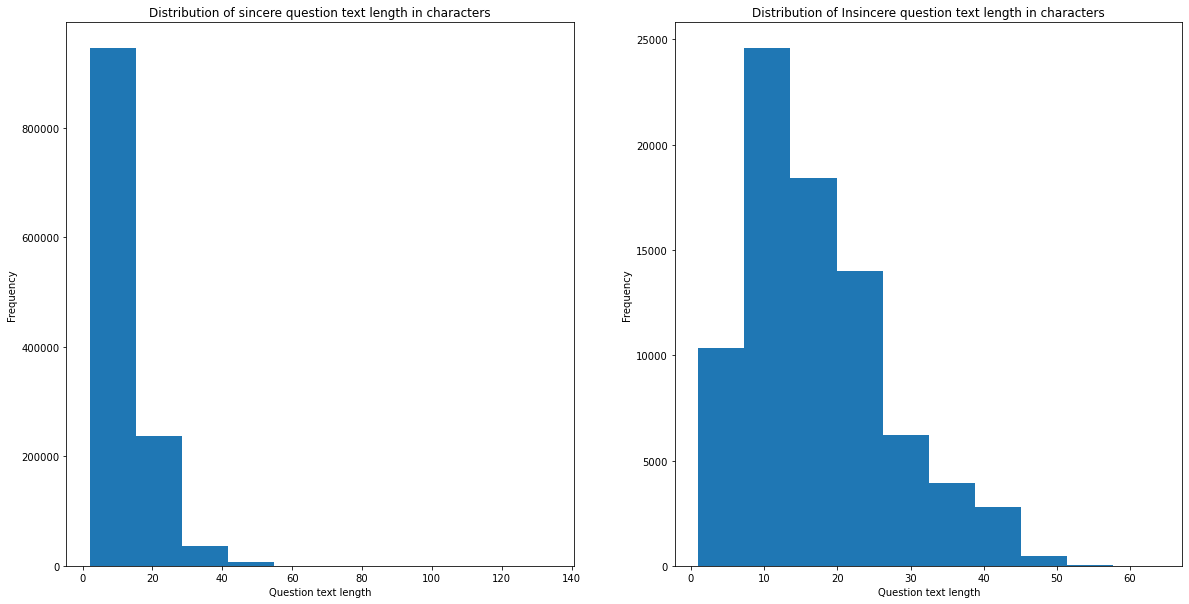

In [46]:
plt.subplot(1, 2, 1)
plt.rcParams["figure.figsize"] = (20,10)
data_sincere['question_text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.title("Distribution of sincere question text length in characters")
plt.xlabel('Question text length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) 
data_insincere['question_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.title("Distribution of Insincere question text length in characters")
plt.xlabel('Question text length')
plt.ylabel('Frequency')

plt.show()

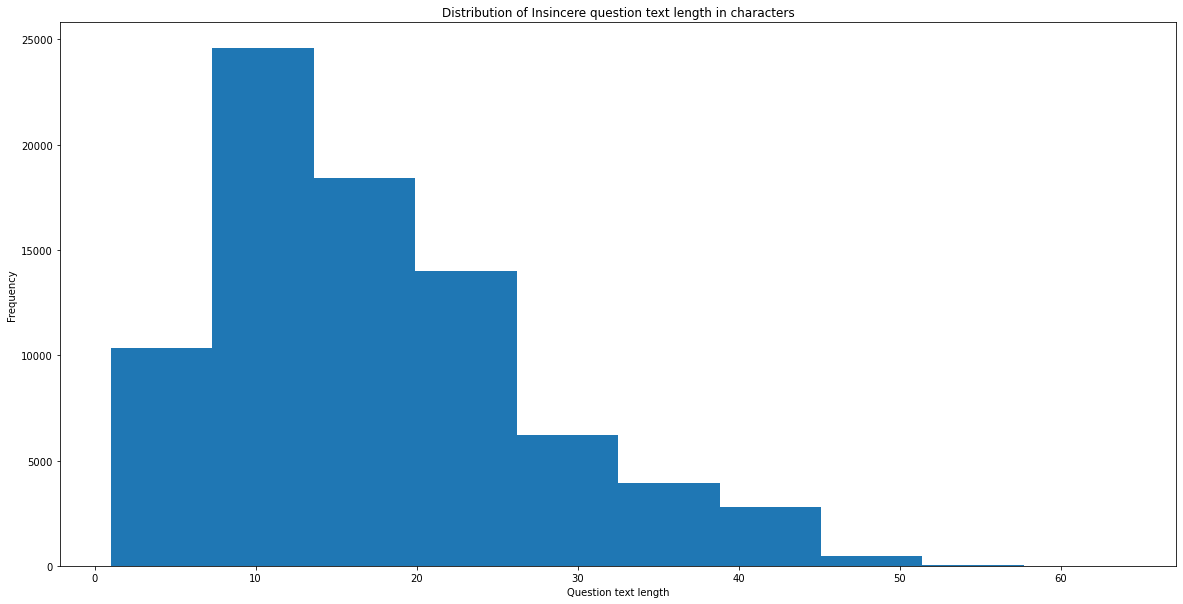

In [21]:
data_insincere['question_text'].apply(lambda x: len(x.split())).plot(kind='hist');
plt.title("Distribution of Insincere question text length in characters")
plt.xlabel('Question text length')
plt.ylabel('Frequency')
plt.show()

#### We could see that most of the Sincere questions are between 2 and 12 characters whereas, most of the Insincere questions are between 9 to 25 characters in length. This could also mean that most of the Insincere questions asked are either making a statement rather then asking a question or in exaggerated tone about something disparaging or inflammatory.

In [22]:
data_exp = pd.read_csv('train.csv')

In [23]:
#Overview of characteristics of the text
data_exp["num_words"] = data_exp["question_text"].apply(lambda x: len(str(x).split()))
data_exp["num_unique_words"] = data_exp["question_text"].apply(lambda x: len(set(str(x).split())))
data_exp["num_chars"] = data_exp["question_text"].apply(lambda x: len(str(x)))
data_exp["num_stopwords"] = data_exp["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
data_exp["num_punctuations"] = data_exp['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
data_exp["num_words_upper"] = data_exp["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


In [24]:
data_exp

qid  \
0        00002165364db923c7e6   
1        000032939017120e6e44   
2        0000412ca6e4628ce2cf   
3        000042bf85aa498cd78e   
4        0000455dfa3e01eae3af   
...                       ...   
1306117  ffffcc4e2331aaf1e41e   
1306118  ffffd431801e5a2f4861   
1306119  ffffd48fb36b63db010c   
1306120  ffffec519fa37cf60c78   
1306121  ffffed09fedb5088744a   

                                                                                         question_text  \
0        How did Quebec nationalists see their province as a nation in the 1960s?                        
1        Do you have an adopted dog, how would you encourage people to adopt and not shop?               
2        Why does velocity affect time? Does velocity affect space geometry?                             
3        How did Otto von Guericke used the Magdeburg hemispheres?                                       
4        Can I convert montra helicon D to a mountain bike by just changing the tyres?                   
...                                                                                ...                   
1306117  What other technical skills do you need as a computer science undergrad other than c and c++?   
1306118  Does MS in ECE have good job prospects in USA or like India there are more IT jobs present?     
1306119  Is foam insulation toxic?                                                                       
1306120  How can one start a research project based on biochemistry at UG level?                         
1306121  Who wins in a battle between a Wolverine and a Puma?                                            

         target  num_words  num_unique_words  num_chars  num_stopwords  \
0        0       13         13                72         7               
1        0       16         15                81         10              
2        0       10         8                 67         3               
3        0       9          9                 57         3               
4        0       15         15                77         7               
...     ..       ..         ..                ..        ..               
1306117  0       17         16                93         9               
1306118  0       19         18                91         10              
1306119  0       4          4                 25         1               
1306120  0       13         13                71         5               
1306121  0       11         9                 52         7               

         num_punctuations  num_words_upper  
0        1                 0                
1        2                 0                
2        2                 0                
3        1                 0                
4        1                 2                
...     ..                ..                
1306117  3                 0                
1306118  1                 4                
1306119  1                 0                
1306120  1                 1                
1306121  1                 0                

[1306122 rows x 9 columns]

#### A violin plot for distribution of stopwords

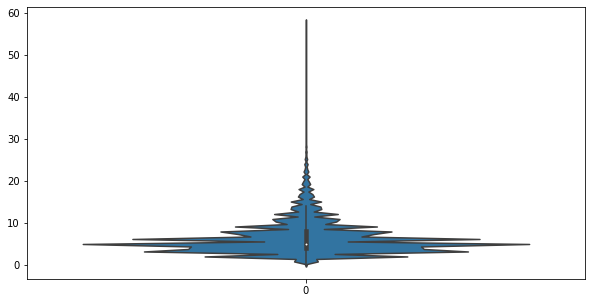

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data_exp['num_stopwords'])
plt.show()

#### A violin plot for distribution of num_chars

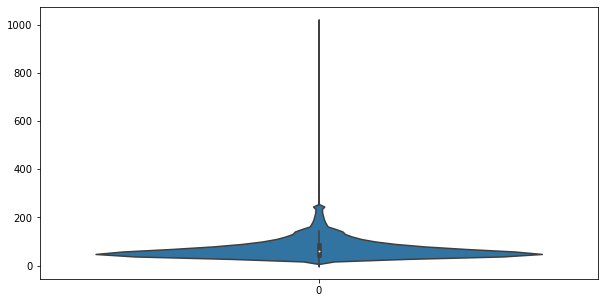

In [26]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data_exp['num_chars'])
plt.show()

#### A violin plot for distribution of num_words

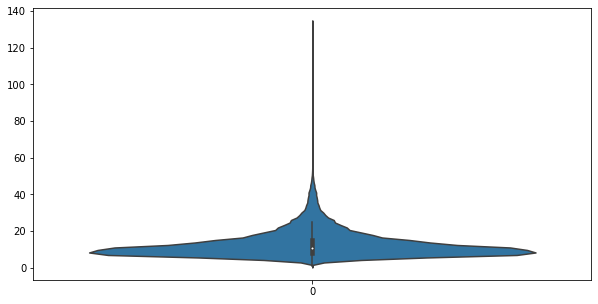

In [27]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data_exp['num_words'])
plt.show()

In [28]:
data_exp_sincere = data_exp[data_exp['target']==0]
data_exp_insincere = data_exp[data_exp['target']==1]

#### density plot for target feature

In [29]:
def generatePlotNumerical(**kwargs):
    
    if 'figsize' in kwargs:
        # print('Here')
        plt.figure(figsize = kwargs['figsize'])

    if kwargs['plot_type'] == 'dist':
        if 'hue' not in kwargs:
            sns.displot(data = kwargs['data'], x=kwargs['feature'], kind="kde", bw_adjust=.25)
        else:
            # print('Jere 2')
            sns.displot(data = kwargs['data'], x=kwargs['feature'], hue = kwargs['hue'], kind="kde", bw_adjust=.25)            


    elif kwargs['plot_type'] == 'box':
        if 'y' not in kwargs:
            sns.boxplot(data = kwargs['data'], x=kwargs['feature'])
        else:
            sns.boxplot(data = kwargs['data'], x=kwargs['feature'],y = kwargs['y'])


    elif kwargs['plot_type'] == 'count':
        ax = sns.countplot(data = kwargs['data'], x=kwargs['feature'])                        
        ax.bar_label(ax.containers[0])
    
    elif kwargs['plot_type'] == 'bar':
        ax = sns.barplot(x = kwargs['x'],y = kwargs['y'])
        if 'show_counts' in kwargs and kwargs['show_counts']==True: 
            ax.bar_label(ax.containers[0])

    if 'use_percentage_y_axis' in kwargs and kwargs['use_percentage_y_axis'] == True:
        plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
        # plt.show()
    
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    if 'xlabel' in kwargs:
        plt.xlabel(kwargs['xlabel'])    
    if 'ylabel' in kwargs:
        plt.ylabel(kwargs['ylabel'])
    if 'show_legend' in kwargs:
        plt.legend()
    plt.show()

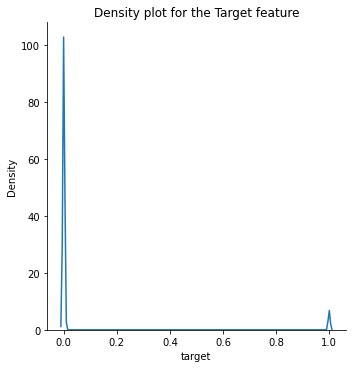

In [30]:
generatePlotNumerical(
    plot_type = 'dist',
    data = data,
    feature = "target",
    title = "Density plot for the Target feature",
    xlabel = "target"
)

#### creating word cloud on the question_text column

In [31]:
#reference: https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc

def build_wordcloud(text, mask=None, max_font_size=80,title = None, title_size=40, image_color=False):
    
    wc = WordCloud(background_color='black',stopwords = STOPWORDS, max_font_size = max_font_size, 
                    random_state = 42, width=800,height=400, mask = mask)
    
    wc.generate(str(text))
    
    plt.figure(figsize=(24,16))
    
    if image_color:
        im = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=im), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wc);
        plt.title(title, fontdict={'size': title_size, 'color': 'black','verticalalignment': 'bottom'})
        
    plt.axis('off');
    plt.tight_layout() 

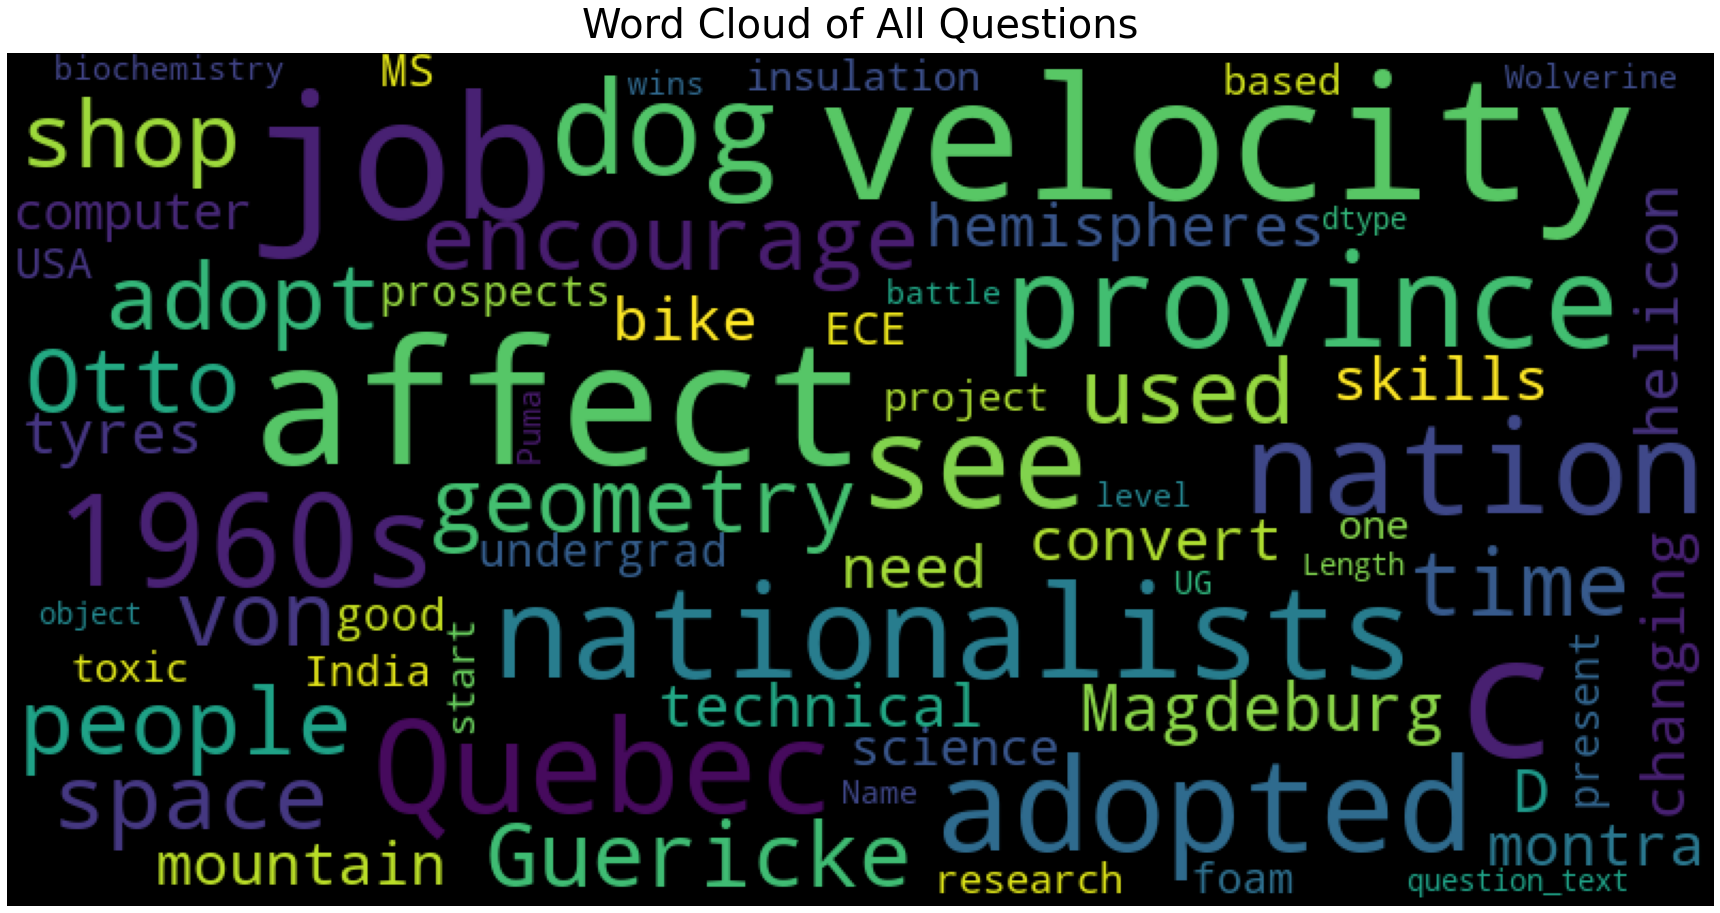

In [32]:
#plot wordcloud for all questions
build_wordcloud(data["question_text"], title="Word Cloud of All Questions")

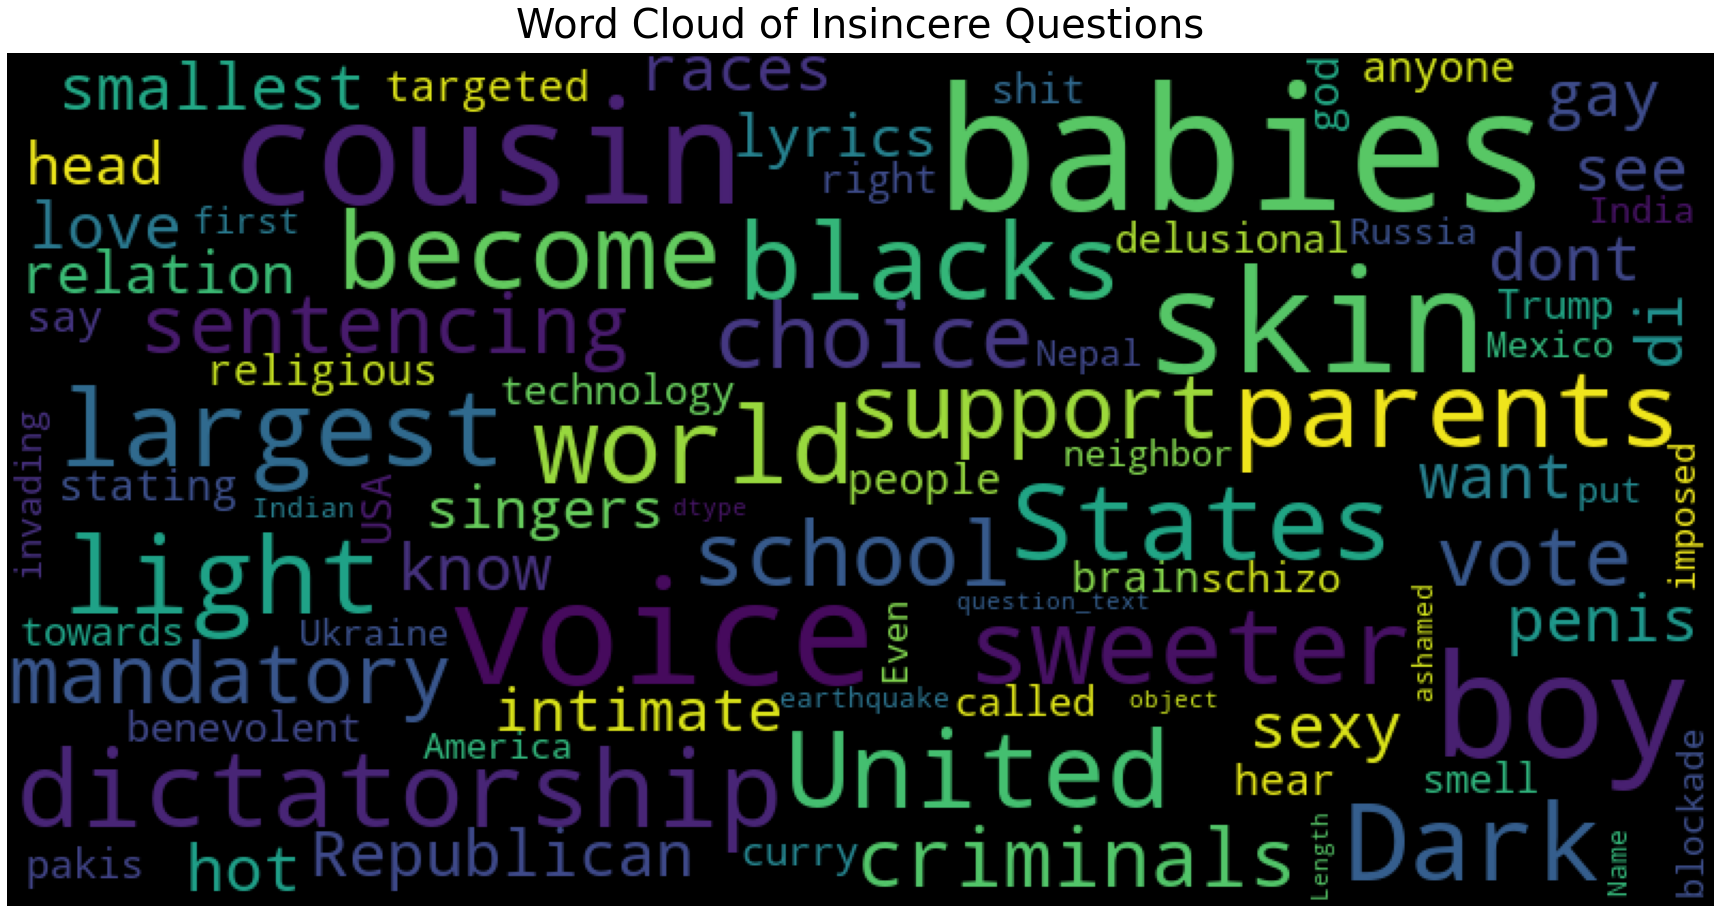

In [33]:
#plot wordcloud for Insincere questions
build_wordcloud(data_insincere["question_text"], title="Word Cloud of Insincere Questions")

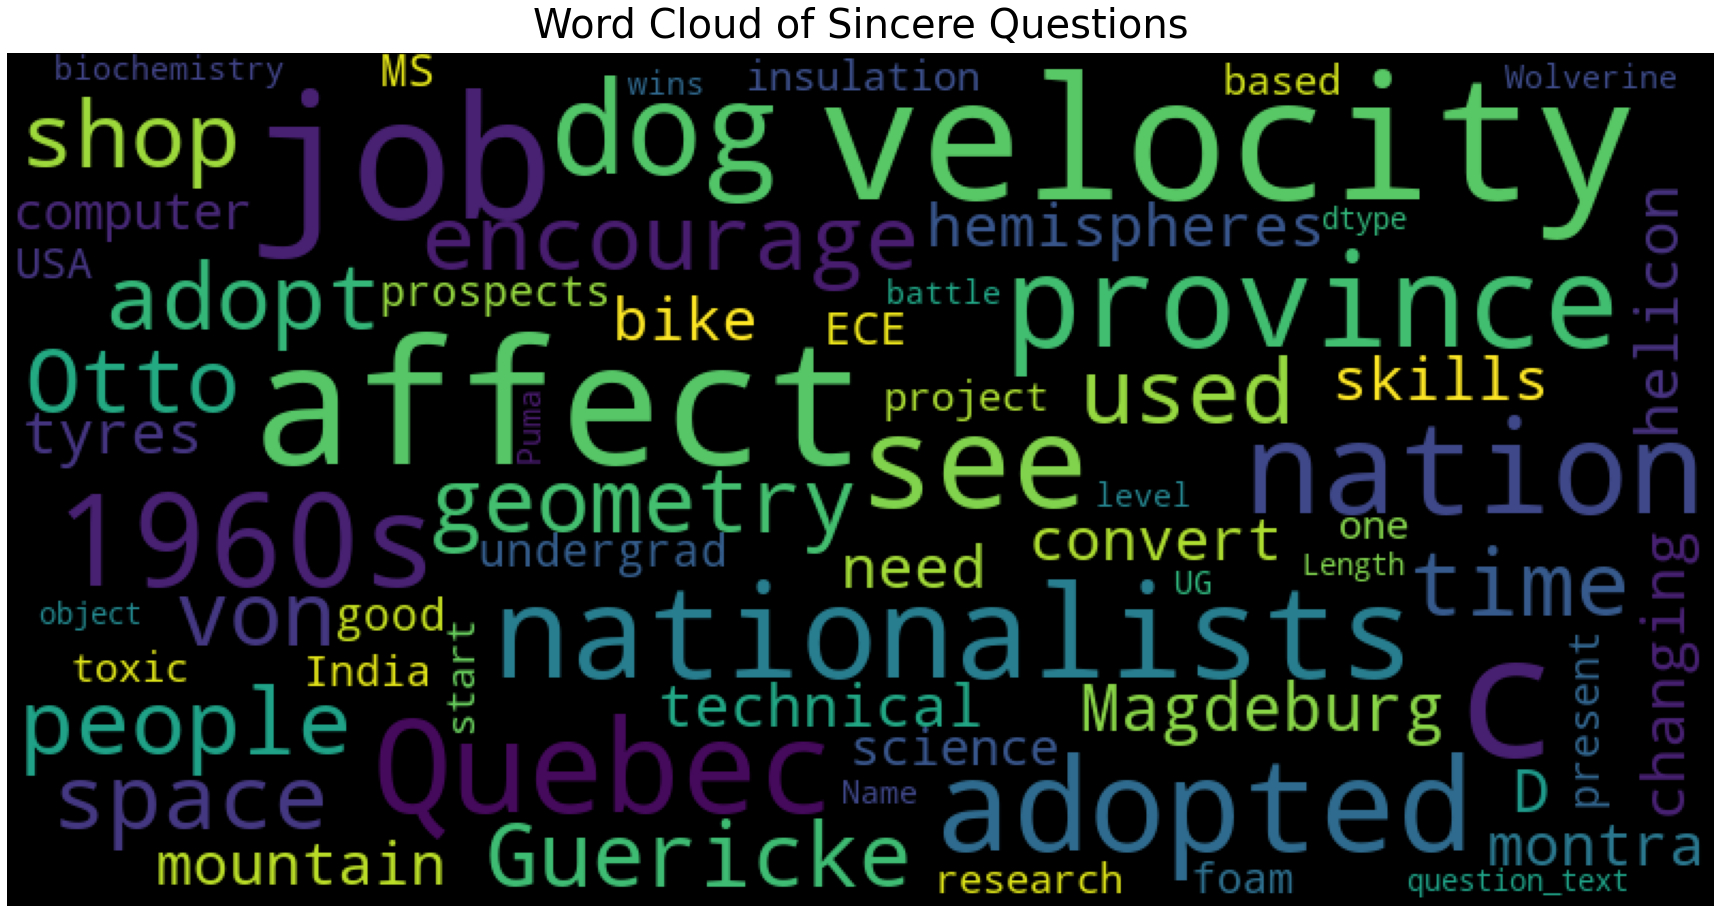

In [34]:
#plot wordcloud for Sincere questions
build_wordcloud(data_sincere["question_text"], title="Word Cloud of Sincere Questions")

In [35]:
insincere_df = data[data["target"]==1]
sincere_df = data[data["target"]==0]

In [36]:
#reference: https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc
def build_grams(question, n=1):
    word = [word for word in question.lower().split(" ") if word != "" if word not in STOPWORDS]
    return [" ".join(res) for res in zip(*[word[i:] for i in range(n)])]

def custom_bar_chart(dataframe, c):
    chart = go.Bar(y=dataframe["word"].values[::-1], x=dataframe["wordcount"].values[::-1],
                   showlegend=False, orientation = 'h',marker=dict(color=c,),)
    return chart


In [37]:
word_dict = defaultdict(int)

for question in sincere_df["question_text"]:
    for w in build_grams(question):
        word_dict[w] += 1
        
x = pd.DataFrame(sorted(word_dict.items(), key=lambda x: x[1])[::-1])
x.columns = ["word", "wordcount"]
fig0 = custom_bar_chart(x.head(50), 'green')

In [38]:
word_dict = defaultdict(int)

for question in insincere_df["question_text"]:
    for w in build_grams(question):
        word_dict[w] += 1
        
x = pd.DataFrame(sorted(word_dict.items(), key=lambda x: x[1])[::-1])
x.columns = ["word", "wordcount"]
fig1 = custom_bar_chart(x.head(50), 'red')

In [39]:
#reference: https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc
fig = plotly.subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Freq words for sincere questions", 
                                          "Freq words for insincere questions"])
fig.append_trace(fig0, 1, 1)
fig.append_trace(fig1, 1, 2)

fig['layout'].update(height=1200, width=900, title="Unigram Plots")
py.iplot(fig)

Not able to display plotly plots on github so had to attach screenshot.

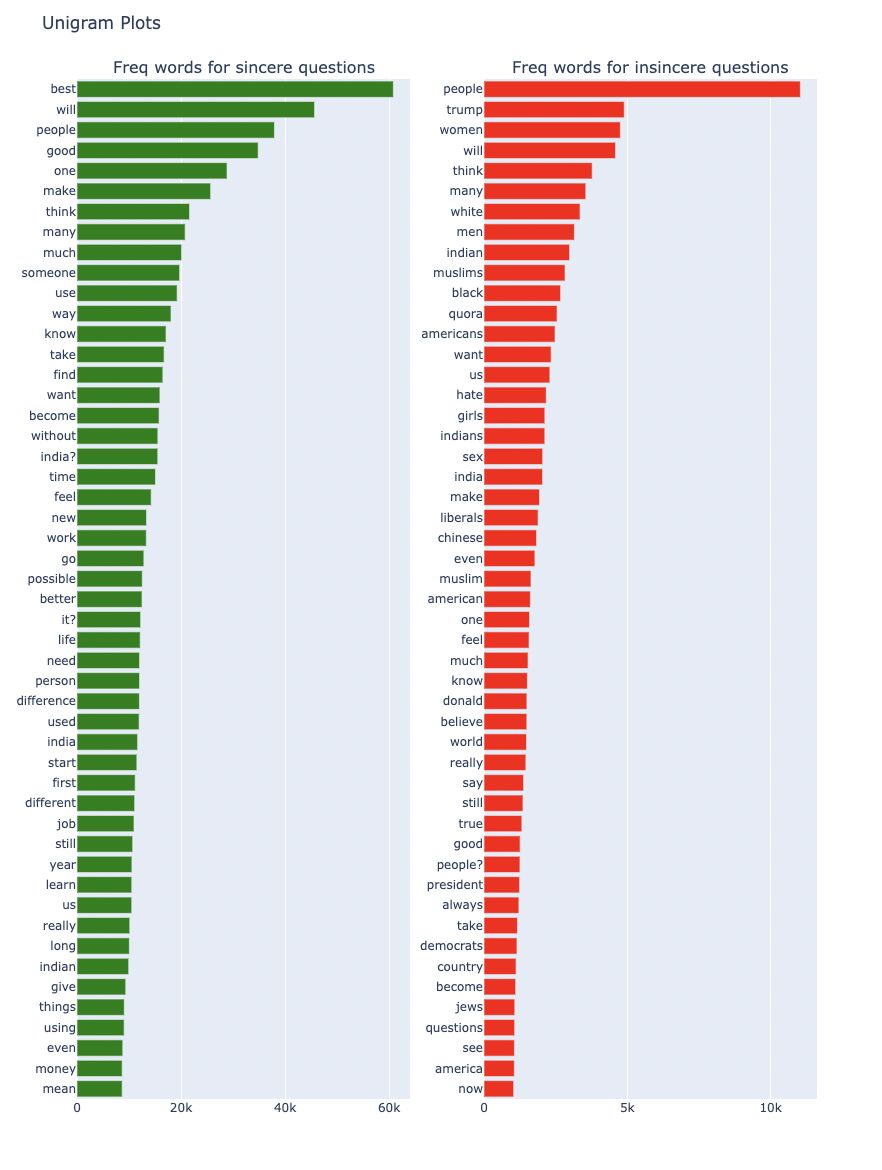

In [40]:
word_dict = defaultdict(int)

for question in sincere_df["question_text"]:
    for w in build_grams(question,2):
        word_dict[w] += 1
        
x = pd.DataFrame(sorted(word_dict.items(), key=lambda x: x[1])[::-1])
x.columns = ["word", "wordcount"]
fig0 = custom_bar_chart(x.head(50), 'green')

In [41]:
word_dict = defaultdict(int)

for question in insincere_df["question_text"]:
    for w in build_grams(question,2):
        word_dict[w] += 1
        
x = pd.DataFrame(sorted(word_dict.items(), key=lambda x: x[1])[::-1])
x.columns = ["word", "wordcount"]
fig1 = custom_bar_chart(x.head(50), 'red')

In [42]:
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Freq bigrams for sincere questions", 
                                          "Freq bigrams for insincere questions"])

fig.append_trace(fig0, 1, 1)
fig.append_trace(fig1, 1, 2)
fig['layout'].update(height=1200, width=900, title="Bigram Plots")
py.iplot(fig)

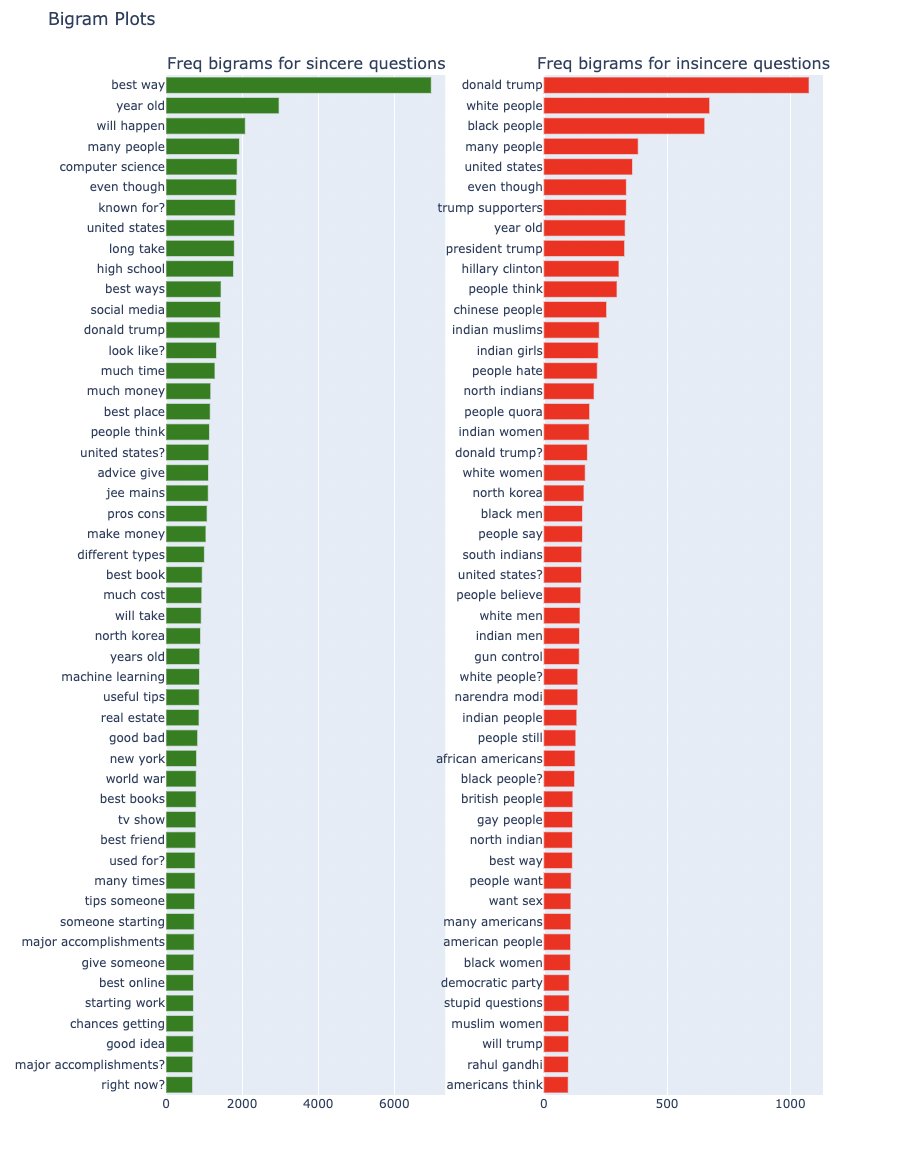

In [43]:
word_dict = defaultdict(int)

for question in sincere_df["question_text"]:
    for w in build_grams(question,3):
        word_dict[w] += 1
        
x = pd.DataFrame(sorted(word_dict.items(), key=lambda x: x[1])[::-1])
x.columns = ["word", "wordcount"]
fig0 = custom_bar_chart(x.head(50), 'green')

In [44]:
word_dict = defaultdict(int)

for question in insincere_df["question_text"]:
    for w in build_grams(question,3):
        word_dict[w] += 1
        
x = pd.DataFrame(sorted(word_dict.items(), key=lambda x: x[1])[::-1])
x.columns = ["word", "wordcount"]
fig1 = custom_bar_chart(x.head(50), 'red')

In [45]:
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Freq trigrams for sincere questions", 
                                          "Freq trigrams for insincere questions"])

fig.append_trace(fig0, 1, 1)
fig.append_trace(fig1, 1, 2)
fig['layout'].update(height=1200, width=1200, title="Trigram Plots")
py.iplot(fig)


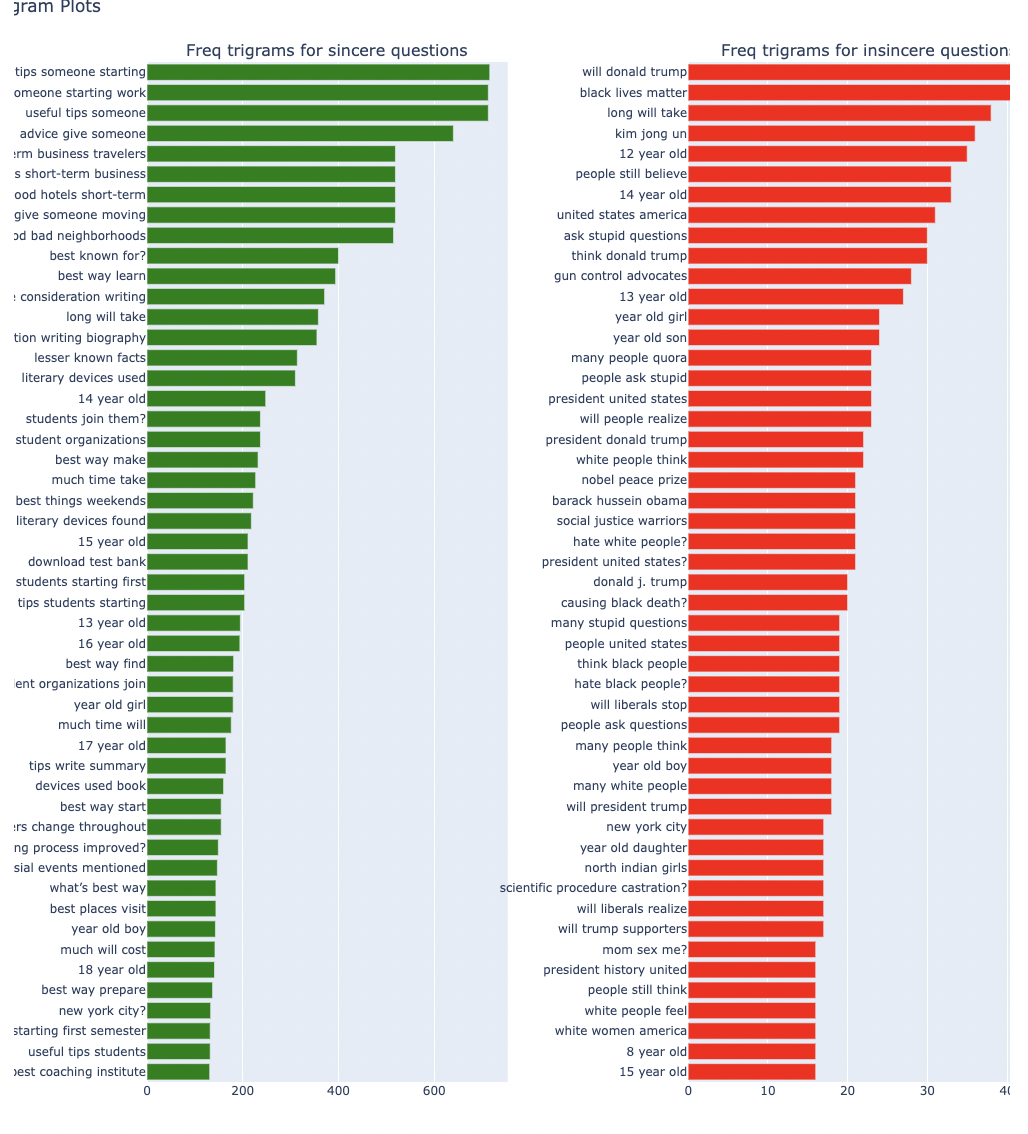